Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

If a variable is given to you, give your answer to that variable. In case of multiple choice questions, answer to the given variable. Make sure your variable has a **string value** and it contains only the letter of your choice. For example if you think that choice b is the correct choice, and the given variable is answer, your answer should look like this:

answer = 'b'

or 

answer = 'B'

If you need to read a file for a task, datafiles, such as .csv or .txt files are found in data subfolder. This can be accessed using data/filename.extension. In case of image, they are found in subfolder images. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [11]:
NAME = "Fahim Istiak"

---

# Multi-Modal Data Fusion - Exercise 1: Python tools and data fusion basics


## Learning goals

After this exercise, you should

- know how to compute and plot PDF and CDF of normal distribution
- be able to use decision tree classifier to solve a classification problem
- know how to split dataset into training and testing sets and evaluate the performance of the machine learning model using confusion matrix
- get familar with data fusion basics
- be able to use logistic regression classifier
- be able to apply clustering algorithms
- be able to model multi-sensor uncertainty in simplified setting

## Relevant lecture

Lecture 1-2.

## Relevant chapters in course book

Chapters 1-3.

## Additional material

- Scipy https://docs.scipy.org/doc/scipy/reference/stats.html
- Scikit-learn https://scikit-learn.org/stable/

# Tutorial

## scipy
https://docs.scipy.org/doc/scipy/reference/stats.html

We discuss another Python module which is useful in many aspects of statistics and probability. Our focus is on the normal distribution $N(\mu,\sigma)$

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

First we have the probability density function (pdf) which we defined ourselves in Exercise 0 and the cumulative distribution function (cdf) which cannot be expressed using elementary functions.

In [13]:
p = stats.norm.pdf(1)
c = stats.norm.cdf(1)
print(p,c)

0.24197072451914337 0.8413447460685429


In order to get a better understanding of these we plot them.

The plot of PDF appearing on Wikipedia page of Gaussian distribution can be prepared as follows:

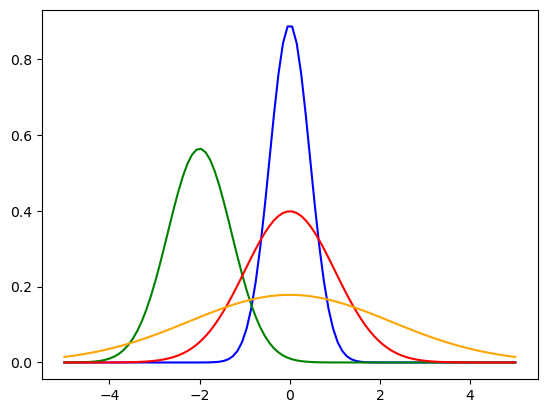

In [14]:
x = np.linspace(-5,5,100)
plt.plot(x,stats.norm(0,np.sqrt(0.2)).pdf(x),c="blue")
plt.plot(x,stats.norm(-2,np.sqrt(0.5)).pdf(x),c="green")
plt.plot(x,stats.norm(0,1).pdf(x),c="red")
plt.plot(x,stats.norm(0,np.sqrt(5)).pdf(x),c="orange")

And the same for CDF:

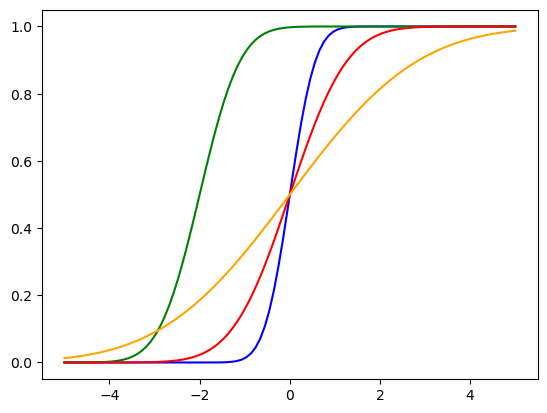

In [15]:
plt.plot(x,stats.norm(0,np.sqrt(0.2)).cdf(x),c="blue")
plt.plot(x,stats.norm(-2,np.sqrt(0.5)).cdf(x),c="green")
plt.plot(x,stats.norm(0,1).cdf(x),c="red")
plt.plot(x,stats.norm(0,np.sqrt(5)).cdf(x),c="orange")


## sklearn

Let us continue to explore some main concepts from machine learning. As a case example we use the iris data set introduced in Exercise 0. Our goal is to predict the last column (species) based on the first four columns containing flower measurements.

It is good practice in supervised machine learning to split the original data set into two parts: training and testing sets. Here we use 75 % of the data for training and the rest for testing the performance of the model. sklearn provides handy functions for this too.

In [16]:
df = pd.read_csv('data/iris.csv')
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
print("X:")
print(X.head(3))
print("\ny:")
print(y.head(3))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print("\nX_train shape:")
print(X_train.shape)
print("\nX_test shape:")
print(X_test.shape)

X:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2

y:
0    setosa
1    setosa
2    setosa
Name: species, dtype: object

X_train shape:
(112, 4)

X_test shape:
(38, 4)


We solve the classification problem now with decision tree classifier.

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3, random_state = 1)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

When assessing the performance of the model one often uses the confusion matrix in classification problems. In binary classification case this is a 2x2 matrix containing four numbers as follows:


|  | P predicted| N predicted |
| --- | --- | --- |
| P class| TP | FP |
| N class| FN | TN |

where 

- TP stands for true positive i.e. correctly predicted trues (or 1's)
- TN stands for true negative i.e. correctly predicted falses (or 0's)
- FP stands for false positive i.e. incorrectly predicted trues
- FN stands for false negative i.e. incorrectly predicted falses.

The precision score of the model is the ratio
$$
\frac{TP}{TP+FP}
$$
and accuracy is the ratio
$$
\frac{TP+TN}{n}
$$


These can be extended for non-binary classification problems straightforwardly. In ideal case we would like to have most of the predictions on the diagonal of the confusion matrix.

Here is example how to compute and plot the confusion matrix in sklearn.

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


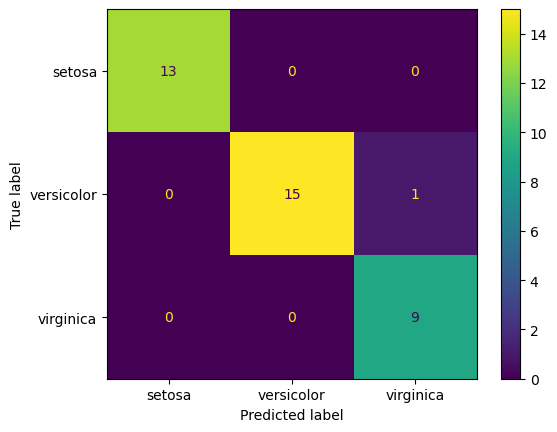

In [18]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,prediction))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, prediction)
plt.show()

Precision score for each class and accuracy can be found in sklearn's classification report or individually.

In [19]:
print(metrics.classification_report(y_test, prediction))
print(metrics.accuracy_score(y_test,prediction))
print(metrics.precision_score(y_test,prediction,average=None))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158
[1.  1.  0.9]


# Assignments
Below you will find the assignments to be returned. Use code cells and markdown cells to type your answers where appropriate. 

## Multiple choice questions
Indicate one answer clearly to each question. 

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 1</b>

<p>Geographical area is covered with temperature, humidity and vision sensors to assess the probability of forest fires in the area. In terms of data fusion scheme, what is the fusion type of this setup?</p>
    
<p>A) across sensors</p>
    
<p>B) across attributes</p>
    
<p>C) across domains</p>
<p>D) across time</p>
    
    
<p>If this test fails, check your answer format. All answers to multiple choice questions should be given by assigning a value to the given variable. The value should be only the letter, no extra whitespace or extra characters such as brackets. </p>

</div>

In [59]:
# Give your answer as a string with one of the given values
answer1 = "B"
assert answer1.lower() in ["a", "b", "c", "d"]

In [ ]:
# Your points for the Problem 1 will be given in this cell. Dont modify it.

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Problem 2</b>

    
<p> Consider a fusion process where two or more overlaying camera images are fused together to reduce noise in images. What is the sensor configuration in this setup?</p>
<p>A) complementary</p>
    
<p>B) competitive</p>
    
<p>C) cooperative</p>

</div>

In [21]:
answer2 = "B"
assert answer2.lower() in ["a", "b", "c"]

In [ ]:
# Your points for the Problem 2 will be given in this cell. Do not modify it.

<a id='Task1.3'></a>
<div class=" alert alert-warning">
    <b>Problem 3</b>

    
<p> Consider a sensor measuring barometric pressure. The sensor is used to measure altitude, but includes offset to estimate absolute height. What type of sensor error this represents?</p>
<p>A) Random error</p>
    
<p>B) Systematic error</p>
    
<p>C) Spurious reading error</p>

</div>

In [22]:
answer3 = "B"
assert answer3.lower() in ["a", "b", "c"]

In [ ]:
# Your points for the Problem 3 will be given in this cell. Do not modify it.

<a id='Task1.4'></a>
<div class=" alert alert-warning">
    <b>Problem 4</b>

    
<p> Consider a GPS localization system where noisy measurements are temporally fused with extended Kalman Filter. What type of fusion network architecture this system represents?</p>
<p>A) Parallel network system</p>
    
<p>B) Serial network system </p>
    
<p>C) Iterative network system</p>

</div>

In [23]:
answer4 = "B"
assert answer4.lower() in ["a", "b", "c"]

In [ ]:
# Your points for the Problem 4 will be given in this cell. Do not modify it.

<a id='Task1.5'></a>
<div class=" alert alert-warning">
    <b>Problem 5</b>

    
<p> Put in order (from best to worst) the fusion topologies based on how they can handle the redudant information processing problem</p>
<p>A) Centralized fusion</p>
    
<p>B) Decentralized fusion</p>
    
<p>C) Hierarchical fusion</p>

<p> Give your answer as a list with the best option first. The elements should be given as instructed in the first question.</p>
</div>

In [24]:
# Give your answer as a list containing string elements with value a, b or c, from best to worst 
answer5 = ["B", "C", "A"] # Your answer here

In [ ]:
# Your points for the Problem 5 will be given in this cell. Do not modify it.

## scipy

Use Python (and its modules) to answer to the following problems.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 6</b>

<p>Consider the standard normal distribution with zero mean and unit standard deviation. About 68 % of the values drawn from the distribution are within one standard deviation away from the mean. How large portion of the values are within 1.5 standard deviations from the mean? Plot the probability distribution function and shade the area corresponding to this portion. Your plot should look something like below. You are free to choose your own colors, axis labels, titles etc.
<br>
<img src="images/norm_shaded.png" />
</p>
<br>
<p>Calculate and return value of portion in function calculate_portion() below</p> 

</div>

In [66]:
from scipy.stats import norm

def calculate_portion():
    # Calculate and return the portion of the values within 1.5 standard deviations from the mean. 
    
    # Do NOT return a percentage. The value returned should be between 0 and 1. 
    
    # YOUR CODE HERE

    portion = norm.cdf(1.5) - norm.cdf(-1.5)
    return portion

    
   # raise NotImplementedError()
    
    return portion

calculate_portion()

0.8663855974622838

In [ ]:
# Your points for the Problem 6 will be given in this cell. Do not modify it.

## sklearn

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 7</b>

<p>Consider the dataset containing peoples heights (inches) and weights (pounds). Make all the following steps in predict_sex -function given in the cell below</p>
<p>a) Plot in same figure the observations corresponding to males and females separately. Use different color for these classes.</p>
<p>b) Choose sex for target variable and weight and height for explanatory variables.</p>
<p>c) Split dataset into training set and test set with 80/20 ratio. Use test_size = 0.2 and random_state = 0</p>
<p>d) Train logistic regression classifier from sklearn with training data.</p>
<p>e) Plot confusion matrix of your trained model.</p>
<p>f) Predict sex of a person whose height is 190.5 cm (75 in) and weight is 102 kg (225 lbs).</p>
</div>


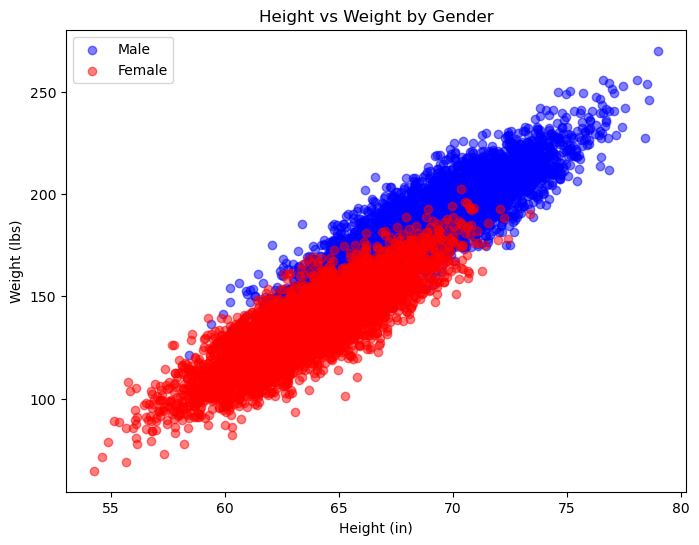

<Figure size 600x600 with 0 Axes>

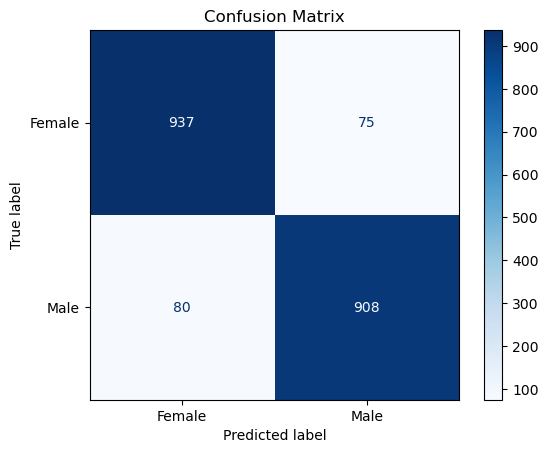

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0) # Do not change or remove

def predict_sex(height, weight):
    
    # Read the data data/weight-height.csv to a variable using pandas
    df = pd.read_csv('data/weight-height.csv')
    # a) Plot in same figure the observations corresponding to males and females separately. Use different color for these classes 

    males = df[df['Gender'] == 'Male']
    females = df[df['Gender'] == 'Female']
    
    plt.figure(figsize=(8,6))
    plt.scatter(males['Height'], males['Weight'], color='blue', label='Male', alpha=0.5)
    plt.scatter(females['Height'], females['Weight'], color='red', label='Female', alpha=0.5)
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend()
    plt.title('Height vs Weight by Gender')
    plt.show()
    
    # b) Choose sex for target variable and weight and height for explanatory variables.


    df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    X = df[['Height', 'Weight']]
    y = df['Gender']
    
    # c) Split the data to a train and test sets. Use test_size = 0.2 and random_state = 0

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # d) Train logistic regression classifier from sklearn with training data.


    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # e) Plot confusion matrix of your trained model.

    y_pred = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,6))
    metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Female', 'Male']).plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    
    # f) Predict sex of a person whose height is 190.5 cm (75 in) and weight is 102 kg (225 lbs).

    
    

    
    # Return single prediction and confusion matrix

    

    
    
    # Hint! See the tutorial above for example of the confusion matrix. Remember to assign a value to a variable. 
    
    # Single datapoint that should be used for the prediction. DO NOT change OR remove the following line !!
    x_single = pd.DataFrame([[height,weight]], columns = ['Height', 'Weight'])
    # You can test other the prediction of other datapoints by giving different height and weight in the function call.

    prediction = model.predict(x_single)[0]

    return prediction, confusion_matrix
    
    # YOUR CODE HERE
   # raise NotImplementedError()
    
    return prediction, confusion_matrix

pred, matrix = predict_sex(75,225)

In [ ]:
# Your points for the Problem 7 prediction and data plot part will be given in this cell. Do not modify it.

In [ ]:
# Your points for the Problem 7 confusion matrix part will be given in this cell. Do not modify it.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 8</b>

<p>Consider the dataset from file bananas.csv</p>
    <p>a) Plot all observations from second column (y-value) against the first column (x-value) in black dots.</p>
    <p>b) Apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>K-means</a> clustering algorithm from sklearn with 2 clusters. Save the labels returned by KMeans to variable labels1. Plot the resulting class labels with different colors in same figure. So: dots labeled 1 in one color and dots labeled 0 in another color.
    </p>
    <p>c) Apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a> algorithm from sklearn with 2 clusters and parameter affinity='nearest_neighbors'. Save the labels returned by SpectralClustering to variable labels2. Plot labels as in step b).</p>
 <p>d) Interpret results by comparing the outcomes of the two algorithms.</p>
</div>

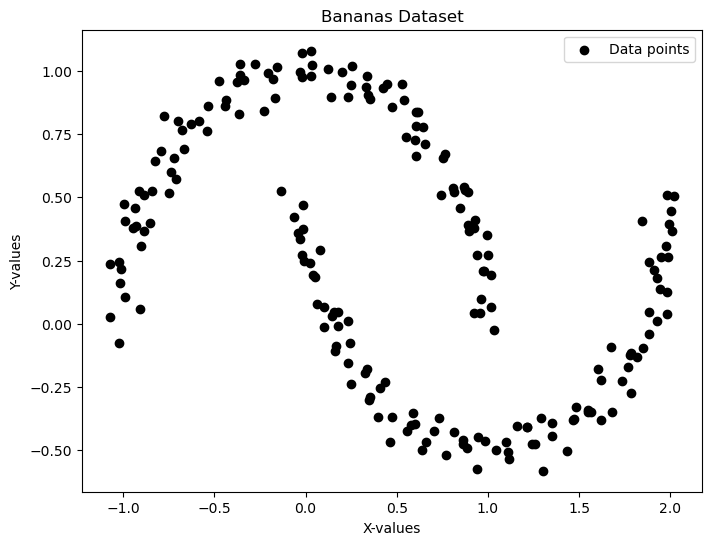

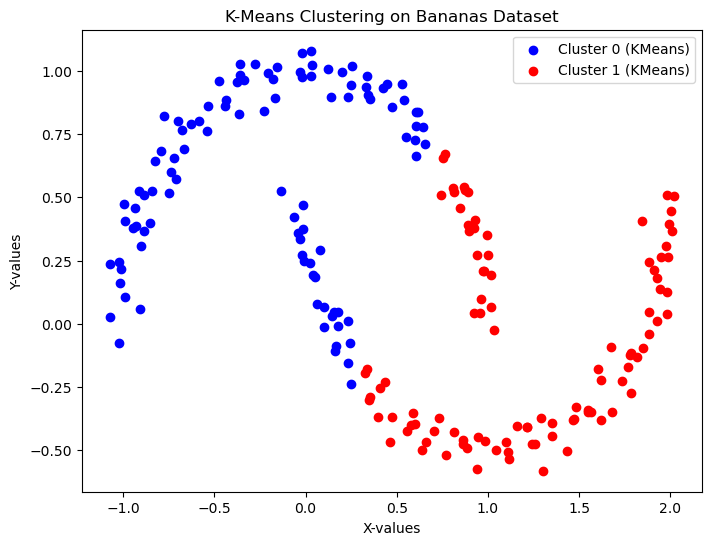

NotImplementedError: 

In [39]:
from sklearn.cluster import KMeans
np.random.seed(0) # Do not change this

# Answer to questions a and b in this cell

# YOUR CODE HERE

data = pd.read_csv('data/bananas.csv')
x_values = data.iloc[:, 0]
y_values = data.iloc[:, 1]

# a)
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, color='black', label='Data points')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Bananas Dataset')
plt.legend()
plt.show()


# b)
kmeans = KMeans(n_clusters=2, random_state=0)
labels1 = kmeans.fit_predict(data)


plt.figure(figsize=(8,6))
plt.scatter(x_values[labels1 == 0], y_values[labels1 == 0], color='blue', label='Cluster 0 (KMeans)')
plt.scatter(x_values[labels1 == 1], y_values[labels1 == 1], color='red', label='Cluster 1 (KMeans)')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('K-Means Clustering on Bananas Dataset')
plt.legend()
plt.show()

# c)

#raise NotImplementedError()

labels1 = labels1 # K-means clustering

In [ ]:
# Your points for the questions a and b will be given in this cell. Do not modify it.

/opt/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


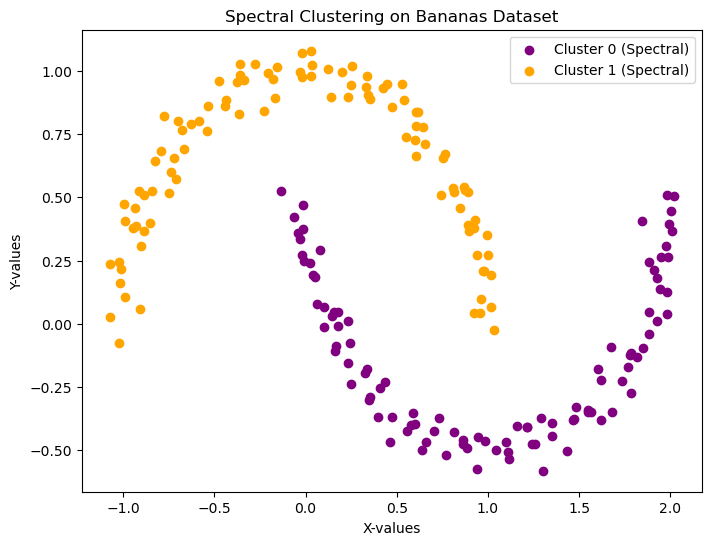

NotImplementedError: 

In [40]:
from sklearn.cluster import SpectralClustering
np.random.seed(0)

# Answer to question c in this cell

# YOUR CODE HERE

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
labels2 = spectral.fit_predict(data)

plt.figure(figsize=(8,6))
plt.scatter(x_values[labels2 == 0], y_values[labels2 == 0], color='purple', label='Cluster 0 (Spectral)')
plt.scatter(x_values[labels2 == 1], y_values[labels2 == 1], color='orange', label='Cluster 1 (Spectral)')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Spectral Clustering on Bananas Dataset')
plt.legend()
plt.show()



#raise NotImplementedError()

labels2 = labels2 # Spectral Clustering

In [ ]:
# Your points for the question c will be given in this cell. Do not modify it.

**Write your answer in the cell below to question d: Interpret results by comparing the outcomes of the two algorithms.**

K-means clustering is predicated on spherical clusters, it has trouble with the "bananas" dataset's complex, non-linear forms and may incorrectly identify points close to cluster boundaries. However, using a graph-based approach using `affinity='nearest_neighbors,' Spectral Clustering`, more precisely captures clusters that are curved or lengthy. As a result, in this dataset, Spectral Clustering performs better than K-means and effectively reveals the underlying structure.

## Multi-sensor spurious measurement

<a id='Task1.9'></a>
<div class=" alert alert-warning">
    <b>Problem 9</b>

<p>Let's consider multiple sensors measuring temperature. Calculate the probability of each measurement being spurious when measurements are $\mathbf{y} = [10, 11, 9, 25, 12]$ and their confidence $\mathbf{\sigma} = [2, 2, 3, 5, 2]$. Model parameter $\theta$ is fixed to MAP estimate of measurements $\mathbf{y}$. Use equations in slides 20-22 (Lecture 2) or course textbook pages 26-27. $\beta_k$ values can be fixed to bound given in eq. in slide 22 (i.e. $\beta_k^2 = 2\sigma_k^2 \prod_{l=1,l \ne k}^K (y_k - y_l)^2$). Implement your solution to the given function stubs and evaluate/print how good the measurements are based on the estimated probabilities.</p>

</div>

In [65]:
import numpy as np

# calculate betas
def get_beta(y, sigma):
    ## IMPLEMENT YOUR SOLUTION HERE ##
    # Hint! remember to take the square root for the final beta values

    
    beta = np.zeros(len(y))
    
    # YOUR CODE HERE

     
    for k in range(len(y)):
        
        product_term = 1
        for l in range(len(y)):
            if l != k:
                product_term *= (y[k] - y[l]) ** 2
        
        # formula - beta
        beta_squared = 2 * (sigma[k] ** 2) * product_term
        # doing square root
        beta[k] = np.sqrt(beta_squared)

    
   # raise NotImplementedError()
    
    return beta



In [ ]:
# Your points for the function get_beta implementation will be given in this cell. Do not modify it.


In [57]:
# calculate alphas
def get_alpha(y, beta):
    ## IMPLEMENT YOUR SOLUTION HERE ##
    # Hint! remember to take the square root for the final alpha values

    
    alpha = np.zeros(len(y))
    
    # YOUR CODE HERE

     
    for k in range(len(y)):
        
        product_term = 1
        for l in range(len(y)):
            if l != k:
                product_term *= (y[k] - y[l]) ** 2
        
        # formula - alpha
        alpha_squared = beta[k] * product_term
        
        alpha[k] = np.sqrt(alpha_squared)

    
  # raise NotImplementedError()
    
    return alpha



IndentationError: unindent does not match any outer indentation level (<string>, line 25)

In [ ]:
# Your points for the function get_alpha implementation will be given in this cell. Do not modify it.

In [58]:
# calculate probabilities
def probability_of_spurious_measurement(theta, y, sigma):
    ## IMPLEMENT YOUR SOLUTION HERE ##
    b = get_beta(y, sigma)
    a = get_alpha(y, b)
    probs = np.zeros(len(y))
    # YOUR CODE HERE

    for k in range(len(y)):
       
        variance = a[k]**2 + sigma[k]**2
        
        prob = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-0.5 * ((theta - y[k])**2 / variance))
        
        probs[k] = prob


    
   # raise NotImplementedError()
    return probs

y = np.array([10, 11, 9, 25, 12])
sigma = np.array([2, 2, 3, 5, 2])
theta = 11
print('Probabilities: ', probability_of_spurious_measurement(theta, y, sigma))

Probabilities:  [1.44358204e-03 1.60098231e-03 2.05913271e-04 1.64340128e-08
 3.44345852e-04]


In [ ]:
# Your points for the function probability_of_spurious_measurement implementation will be given in this cell. Do not modify it.

# Have you used any generative AI tools to assist with your work on this exercise?
"Yes" or "No", answer in the cell below

Yes

## If "Yes", please provide the names of those tools along with a brief explanation of how you used them.
Answer in the cell below

I took assistance from StackOverflow to help clarify the approach for calculating probabilities and understanding related mathematical concepts. I also asked chatgpt why raise "NotImplementedError()" showing error everytime i run the code, and got the solutions. And it was completely my fault that it didn't read instructions carefully at first place. i was just skimming it.  i also watched some youtube videos realted to this assignment before starting the code.